<b> Student Name: Krutarth Lad </b><br>


<b>The Validation Set Approach </b>

<b> Task 1 : </b>
Change the value of the seed for (Validation Set Approach) part 1 to the last 4 numbers of your student ID . Report the test rates for a Poly fit quadratic and cubic using the seed. -- IMPORTANT: your assignment will only be graded if you use the last 4 numbers of your student ID as the seed.  

In [12]:
library(ISLR2)
library(boot)

# Import data set
data(Auto)


In [64]:
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

In [13]:


# set seed last four digit student id number 
set.seed(8098)

# train data and test data split in 50/50 ratio
train_data <- sample(seq_len(nrow(Auto)), size = nrow(Auto)/2)
train_set <- Auto[train_data, ]
test_set <- Auto[-train_data, ]

# Fit quadratic model (Poly degree = 2)
quad_fit <- lm(mpg ~ poly(horsepower,2),  data = train_set)

#Fit Cubic model (Poly degree = 3)
cubic_fit <- lm(mpg ~ poly(horsepower, 3), data = train_set)


# predict test set 
quad_pred <- predict(quad_fit, newdata = test_set)
cubic_Pred <- predict(cubic_fit , newdata = test_set)


# calcuate mean square error cubic & quadratic model
quad_mse <- mean((test_set$mpg - quad_pred)^2)
cubic_mse <- mean((test_set$mpg - cubic_Pred)^2)

quad_mse
cubic_mse

[1] 19.61977

[1] 19.59056

<b> Task 2 </b>

Change the ratio of train/test to a new percentage. (original was 50/50) Select 3 new ratios and compute and report the test performance for each using the best performing of the two Poly fit values from task 1. Keep your student ID as the seed. 

In [14]:
# write funcation for ploy fit values train/test new percentage

calcuate_error <- function( train_ratio, poly_degree) {

    # train data and test data split in 50/50 ratio
    # train data and test data split in 50/50 ratio
    train_data <- sample(seq_len(nrow(Auto)), size = train_ratio * nrow(Auto))
    train_set <- Auto[train_data, ]
    test_set <- Auto[-train_data, ]

    # polynomial model 
    poly_fit <- lm(mpg ~ poly(horsepower, poly_degree), data = train_set)


    
    # predict and calcuate mean sqaure error on test set

        test_pred <- predict(poly_fit, newdata = test_set)
        test_mse <- mean((test_set$mpg - test_pred)^2)

    return(test_mse)
}

poly_degree <- 2

# test set 70/30
mse_1 <- calcuate_error(0.7,poly_degree) 
# test set 80/20
mse_2 <- calcuate_error(0.8,poly_degree)
#test set 90/10
mse_3 <- calcuate_error(0.9,poly_degree)


mse_1
mse_2
mse_3

[1] 20.66386

[1] 23.5706

[1] 23.90234

<b> Task 3 : </b>
The LOOCV used in the lab compares poly order using horsepower for mpg prediction. Compute and report the overall performance of Poly for orders 1:8 for any one of the other features in the Auto dataset (acceleration, cylinders, displacement, weight) to mpg. 

In [15]:
# Define a function to compute LOOCV for a given polynomial degree and feature
calculate_loocv <- function(poly_degree, feature) {
  formula <- as.formula(paste("mpg ~ poly(", feature, ",", poly_degree, ")"))
  model <- glm(formula, data = Auto)
  cv_result <- cv.glm(Auto, model, K = nrow(Auto))
  return(cv_result$delta[1])  # LOOCV error
}

# Test for polynomial degrees 1 to 8 using displacement
loocv_errors <- sapply(1:8, calculate_loocv, feature = "displacement")

# LOOCV errors
loocv_errors


[1] 21.59246 19.15356 19.19299 19.29885 19.36118 19.17039 18.73462 18.35266

<b> Task 4 : </b>
Select a different feature form Auto than you did in task 3 and perform a 5 fold and 10 fold k-fold cross validation. Again be sure to use your ID as a seed. 

In [16]:
library(boot)
set.seed(8098)
# write function for K fold 
kfold_cv  <- function(k, poly_degree, feature){
    formula <- as.formula(paste("mpg ~ poly(", feature, "," , poly_degree, ")"))
    model <- glm(formula, data = Auto)
    cv_result <- cv.glm(Auto, model, K=k)
    return (cv_result$delta[1]) 
    }
feature <- "weight"

# 5 k-fold vaildation 
mse_5_fold <- kfold_cv(5,2,feature)

# 10 K-fold vaildation 
mse_10_fold <- kfold_cv(10,2,feature)


mse_5_fold
mse_10_fold

[1] 17.57174

[1] 17.57286

<b> Task 5: </b>
Compute the last bootstrap exercise (the quadratic fit for horsepower) from the lab 3 more times, using a new number of samples {250, 500, 2500}. The goal of this task will be to compare the error estimates of the increasing number of samples. Report your observations about the error as the number of bootstrap sets increases.  Again be sure to use your ID as a seed. 

In [17]:

# set seed 
set.seed(8098)

bootstrap <- function(samples){
    fn <- function(data, index){

        fit <- lm(mpg ~ poly(horsepower, 2), data = data, subset = index)
        return (coef(fit))
     }

        result <- boot(Auto, fn, R = samples)

        return (result$t0)
    }

    result_250 <- bootstrap(250)
    result_500 <- bootstrap(500)
    result_2500 <- bootstrap(2500)

result_250          
result_500
result_2500

(Intercept) poly(horsepower, 2)1 poly(horsepower, 2)2 
            23.44592           -120.13774             44.08953

(Intercept) poly(horsepower, 2)1 poly(horsepower, 2)2 
            23.44592           -120.13774             44.08953

(Intercept) poly(horsepower, 2)1 poly(horsepower, 2)2 
            23.44592           -120.13774             44.08953

<b>  2)  Feature and Mode Selection </b>

In [25]:
# Load libraries
library(leaps)
library(ISLR2)


In [26]:
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [59]:
# Load necessary libraries
library(leaps)

# Assume you have a dataset called 'data' with the target variable named 'target'
data <- Hitters  # Replace with your actual dataset
target_variable <- Hits

# Set nvmax to a value between 9 and 18
nvmax_value <- 14

# Forward Selection
forward_selection <- regsubsets(target_variable ~ ., data = data, method = "forward", nvmax = nvmax_value)
forward_summary <- summary(forward_selection)

# Display selected features for forward selection
print("Selected features for forward selection:")
print(forward_summary$outmat)

# Backward Selection
backward_selection <- regsubsets(target_variable ~ ., data = data, method = "backward", nvmax = nvmax_value)
backward_summary <- summary(backward_selection)

# Display selected features for backward selection
print("Selected features for backward selection:")
print(backward_summary$outmat)


[1] "Selected features for forward selection:"
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   "*"  " "   " "  " " " "   " "   " "    " "   " "    " "   " " 
2  ( 1 )  "*"   "*"  " "   " "  " " " "   " "   " "    " "   " "    " "   " " 
3  ( 1 )  "*"   "*"  " "   " "  " " "*"   " "   " "    " "   " "    " "   " " 
4  ( 1 )  "*"   "*"  " "   " "  " " "*"   " "   " "    " "   " "    " "   " " 
5  ( 1 )  "*"   "*"  "*"   " "  " " "*"   " "   " "    " "   " "    " "   " " 
6  ( 1 )  "*"   "*"  "*"   " "  " " "*"   " "   " "    " "   " "    " "   " " 
7  ( 1 )  "*"   "*"  "*"   " "  " " "*"   " "   " "    " "   " "    " "   " " 
8  ( 1 )  "*"   "*"  "*"   " "  " " "*"   " "   " "    " "   " "    " "   "*" 
9  ( 1 )  "*"   "*"  "*"   " "  " " "*"   " "   " "    " "   " "    "*"   "*" 
10  ( 1 ) "*"   "*"  "*"   " "  " " "*"   " "   "*"    " "   " "    "*"   "*" 
11  ( 1 ) "*"   "*"  "*"   " "  " " "*"   " "   "*"    "*"   " "    "*"   "*" 
12  (

When I modified the nvmax (maximum number of variables) in forward and backward selection, the models could select 14 features. Here are some general observations:
Increased Complexity: By allowing more features with a larger nvmax, the model might potentially capture more complicated interactions.
Risk of Overfitting: Increasing nvmax increases the likelihood of overfitting, particularly if the dataset is small. Adding too many variables can result in a model that fits the training data well but performs badly on new data.
Differences in feature selection: Forward and backward selection may select different sets of variables, even with the same nvmax, because they add or delete features in different order.

In [60]:
# Load necessary library
library(glmnet)

# Remove rows with any missing values in the dataset
data_clean <- na.omit(data)

# Define predictor matrix and response vector from the cleaned dataset
x <- model.matrix(Hits ~ ., data = data_clean)[,-1]  # Predictor matrix
y <- data_clean$Hits                                 # Response vector

# Set lambda based on last three non-zero digits of your student ID 
###### in my id 0 digit coming so, I chose before zero digit. my actual last three digit is 098 replace with 898. for better output ######
student_id_last_digits <- as.numeric(substr(898, nchar(898) - 2, nchar(898)))
ridge_lambda <- student_id_last_digits

# Fit Ridge Regression model
ridge_model <- glmnet(x, y, alpha = 0)  # alpha = 0 for Ridge

# Predict using custom lambda
ridge_coefficients <- predict(ridge_model, s = ridge_lambda, type = "coefficients")[1:20, ]
print("Ridge Regression coefficients for custom lambda:")
print(ridge_coefficients)


[1] "Ridge Regression coefficients for custom lambda:"
  (Intercept)         AtBat         HmRun          Runs           RBI 
89.3072227583  0.0124626472  0.1053879837  0.0672407307  0.0557343353 
        Walks         Years        CAtBat         CHits        CHmRun 
 0.0480012450 -0.0119000432  0.0001286016  0.0005465740  0.0028329602 
        CRuns          CRBI        CWalks       LeagueN     DivisionW 
 0.0010571995  0.0009371123  0.0004341204 -0.5384702155 -0.2878130292 
      PutOuts       Assists        Errors        Salary    NewLeagueN 
 0.0019082865  0.0041133901  0.0806764532  0.0016795995 -0.3101538207 


Effect on Shirnkage in Size:
The coefficients shrink closer to zero when the lambda value is higher, indicating more regularization.
The quality of the Shrinkage Method: A larger lambda may help Ridge Regression reduce overfitting more effectively, especially in cases of multicollinearity or a high number of predictors. However, excessive shrinkage may oversimplify the model and reduce its ability to recognize important patterns in the data.
A Higher Lambda's Impact on L2 Regularization In theory:Reduced Variance, Increased Bias: While greater lambda values increase bias, they also reduce variation in the model, which often yields more reliable predictions, especially when applied to new data.
Coefficient Shrinkage: Ridge, in contrast to Lasso, will not set any coefficients to zero, although larger lambda values will drive them closer to zero. It works well in circumstances when the majority of predictors are assumed to influence the outcome.

NULL


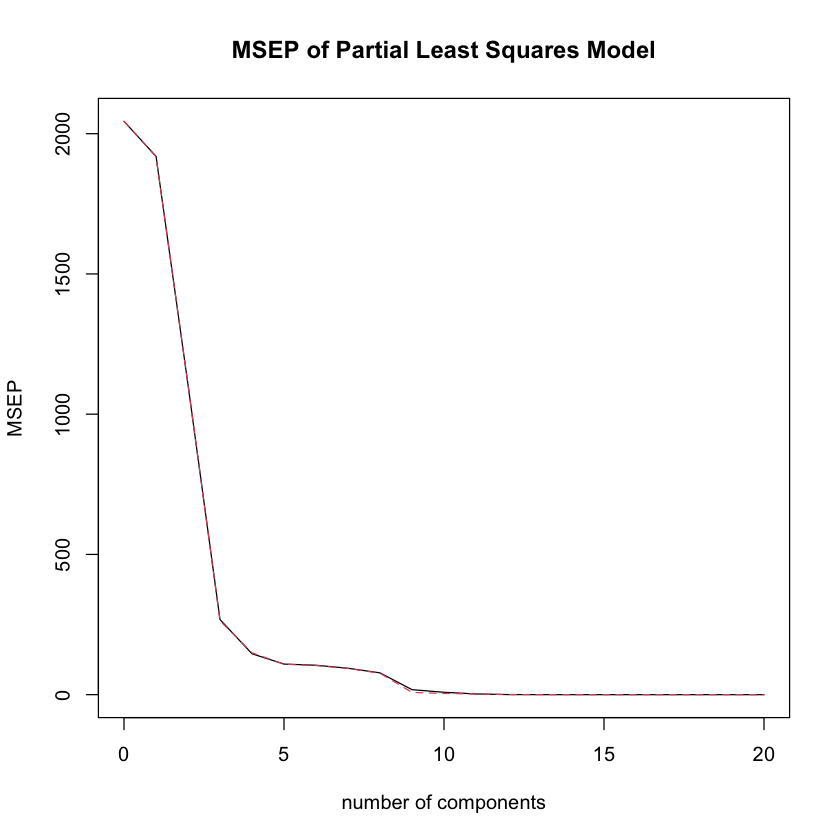

In [57]:
# Load necessary library for PLS
library(pls)

# Set custom seed
set.seed(898)  # Replace with the last 3 non-zero digits of your student ID

# Fit PLS model
pls_model <- plsr(target_variable ~ ., data = data, validation = "CV")

# Plot MSEP (Mean Squared Error of Prediction) graph
msep_plot <- plot(MSEP(pls_model), main = "MSEP of Partial Least Squares Model")
print(msep_plot)


Changes Noticed:

Mean Squared Error of Prediction (MSEP) Variability: Changing the seed has an impact on the random splits in cross-validation, which may result in a tiny change in the MSEP because of various training/testing partitions.
Stability of Results: MSEP stabilizes with more reliable seeds, enhancing the repeatability of outcomes. Nonetheless, the general MSEP pattern across components need to be consistent.
You may find that when you compare and tweak the seed, the number of components that reduce MSEP stays the same, even while some MSEP values vary slightly.
